In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json

data_path = '/content/drive/MyDrive/stride.json'
with open(data_path, 'r') as f:
    data = json.load(f)

print(json.dumps(data, indent=4))  # Pretty-print the JSON


{
    "intents": [
        {
            "intent": "greeting",
            "text": [
                "Hello",
                "Hi",
                "Good morning",
                "Hey"
            ],
            "responses": [
                "Hello!I am a rookie how can i help you with your health and fitness goals today?",
                "Hi i am rookie! Ready to plan your workout or meal?"
            ]
        },
        {
            "intent": "workout_splits",
            "text": [
                "What are the best workout splits?",
                "Can you suggest a workout split?",
                "How should I divide my workouts?"
            ],
            "responses": [
                "Popular workout splits include Push/Pull/Legs, Upper/Lower, and Full-body routines depending on your goals.",
                "A 5-day split focusing on chest, back, shoulders, legs, and arms can maximize growth."
            ]
        },
        {
            "intent": "repetitions",
    

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.0105 - loss: 5.7789 - val_accuracy: 0.0198 - val_loss: 5.5558
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.0292 - loss: 5.4580 - val_accuracy: 0.0274 - val_loss: 5.3004
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.0162 - loss: 5.2547 - val_accuracy: 0.0297 - val_loss: 5.0760
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.0223 - loss: 5.0881 - val_accuracy: 0.0328 - val_loss: 4.9249
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.0402 - loss: 4.9508 - val_accuracy: 0.0320 - val_loss: 4.7726
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.0370 - loss: 4.8248 - val_accuracy: 0.0450 - val_loss: 4.6771
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.0330 - loss: 4.7561 - val_accuracy: 0.0579 - val_loss: 4.4912
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.0584 - loss: 4.5134 - val_acc

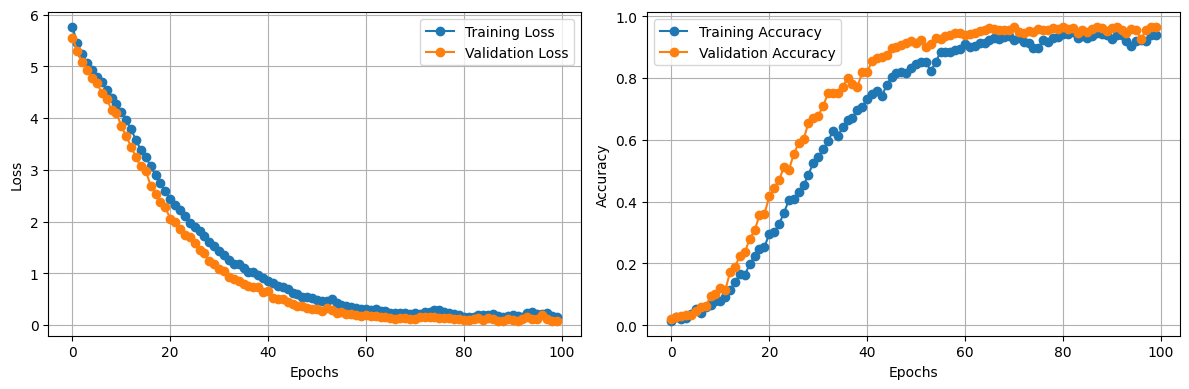

In [ ]:
import json
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, GRU, Attention, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the intent data
data_path = '/content/drive/MyDrive/stride.json'  # Update this path as necessary
with open(data_path, 'r') as f:
    data = json.load(f)

intents = data['intents']

# Prepare training data
X = []
y = []

for i in intents:
    for text in i['text']:
        X.append(text)
        y.append(i['intent'])

# Tokenize the input texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert the input texts to sequences and pad them
X = tokenizer.texts_to_sequences(X)
max_sequence_length = max([len(seq) for seq in X])  # Find the max sequence length
X = pad_sequences(X, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
from tensorflow.keras.layers import GlobalMaxPooling1D

# Define a more complex model with Bidirectional LSTM, GRU, Attention, and Dropout
inputs = Input(shape=(max_sequence_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128)(inputs)  # Removed input_length from Embedding
bi_lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)  # Bidirectional LSTM
gru = GRU(128, return_sequences=True)(bi_lstm)  # GRU layer
attention = Attention()([gru, gru])  # Attention layer
attention_output = GlobalMaxPooling1D()(attention)  # Use GlobalMaxPooling1D to reduce the sequence
attention_output = Dropout(0.2)(attention_output)  # Dropout for regularization
flatten = Dense(128, activation='relu')(attention_output)  # Dense layer with ReLU activation
output = Dense(len(label_encoder.classes_), activation='softmax')(flatten)  # Output layer

# Compile the model
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_data=(X, y))

# Save the model
model.save('/content/drive/MyDrive/rookie.h5')  # Save the model

# Plotting training history (Loss and Accuracy)
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import random

# Load the trained complex model
model = load_model('/content/drive/MyDrive/rookie.h5')

# Load the intent data
data_path = '/content/drive/MyDrive/stride.json'  # Update the file path as necessary
with open(data_path, 'r') as file:
    data = json.load(file)
intents = data['intents']

# Initialize the tokenizer and label encoder
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text for intent in intents for text in intent['text']])
label_encoder = LabelEncoder()
labels = [intent['intent'] for intent in intents]
label_encoder.fit(labels)

# Preprocess input function
def preprocess_input(user_input):
    sequence = tokenizer.texts_to_sequences([user_input])
    sequence = pad_sequences(sequence, maxlen=max_sequence_length)  # Adjust the length based on training
    return sequence

# Get response function
def get_response(user_input):
    # Preprocess input
    sequence = preprocess_input(user_input)

    # Predict intent
    prediction = model.predict(sequence)
    predicted_class = prediction.argmax(axis=1)
    intent = label_encoder.inverse_transform(predicted_class)

    # Find the corresponding intent and respond
    for i in intents:
        if i['intent'] == intent[0]:
            return random.choice(i['responses'])
    return "I'm sorry, I didn't understand that."

# Chat function
def chat():
    print("Chatbot: Hello! How can I assist you today?")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "quit":
            print("Chatbot: Goodbye!")
            break
        response = get_response(user_input)
        print(f"Chatbot: {response}")

# Start the chatbot
chat()


Chatbot: Hello! How can I assist you today?
